In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

In [2]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

In [3]:
with open('ProperN.txt', 'rt',encoding="utf-8") as txt:
    ProperN= txt.read()
ProperN = ProperN.split("\n")
for w in ProperN:
    jieba.add_word(w)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\chloe\AppData\Local\Temp\jieba.cache
Loading model cost 1.371 seconds.
Prefix dict has been built succesfully.


In [4]:
with open('stopword.txt', 'rt',encoding="utf-8") as txt:
    stopword = txt.read()
stopword = stopword.split("\n")

In [7]:
def makewordcloud(n,title):
    font = "msjh.ttc"
    #open file
    with open('TECO/'+str(n)+'.txt', 'rt',encoding="utf-8") as txt:
        data = txt.read()
    #text segmentation
    seg_list = jieba.cut(data, cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    jump = False
    for word in seg_list:
        for s in word:
            if not is_chinese(s):
                jump = True
                break
        if word not in stopword:
            if not jump:
                if word in wordDict:
                    wordDict[word] = wordDict[word] + 1
                else:
                    wordDict[word] = 1
        jump = False
    #wordcloud
    plt.style.use('ggplot') 
    wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
    wordcloud.fit_words(wordDict)
    plt.rcParams["font.sans-serif"]=["SimHei"]
    plt.figure(figsize=(12,10))
    plt.title(title,fontsize=30)
    plt.grid(False)
    plt.imshow(wordcloud)
    #Top10bar
    top10 = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)[:10]
    
    plt.figure(figsize=(10,6))
    plt.bar(range(0,10),dict(top10).values())
    plt.title(title+"Top10",fontsize=30)
    plt.yticks(fontsize=15)
    plt.xticks(range(0,10),dict(top10).keys(),fontsize=15)
    plt.ylabel("出現次數",fontsize=15)
    plt.show()

In [8]:
Title = ["壹、致股東報告書","貳、公司簡介","參、公司治理報告","肆、募集情形暨資金運用計畫執行情形","伍、營運概況","陸、財務概況","柒、財務狀況及財務績效之檢討分析與風險事項","捌、特別記載事項"]

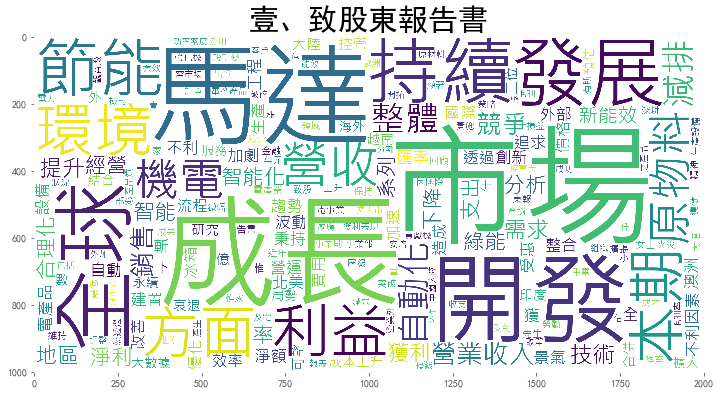

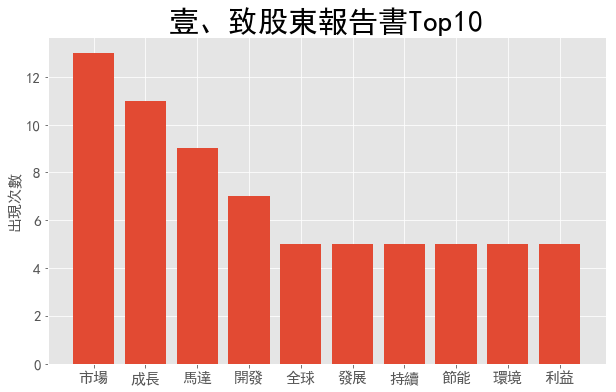

In [9]:
makewordcloud(1,Title[0])

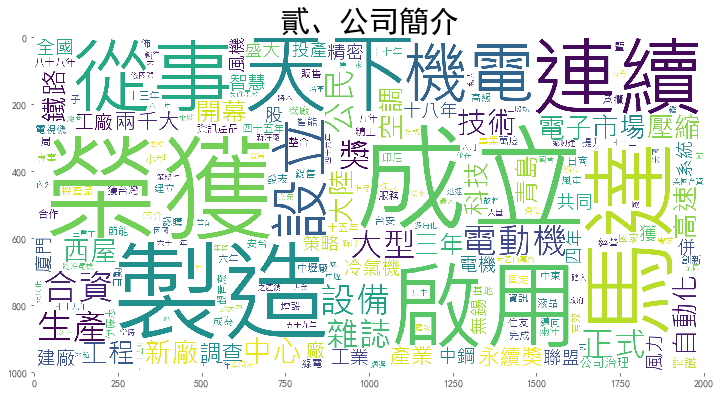

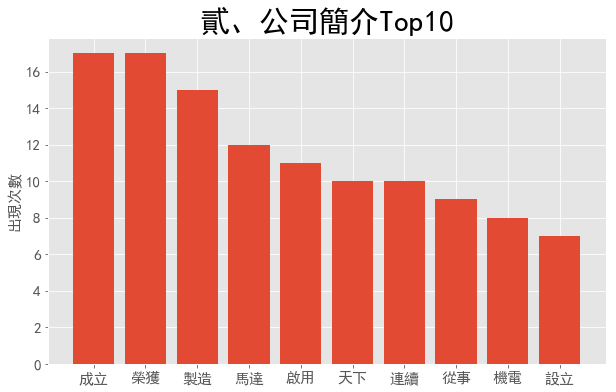

In [10]:
makewordcloud(2,Title[1])

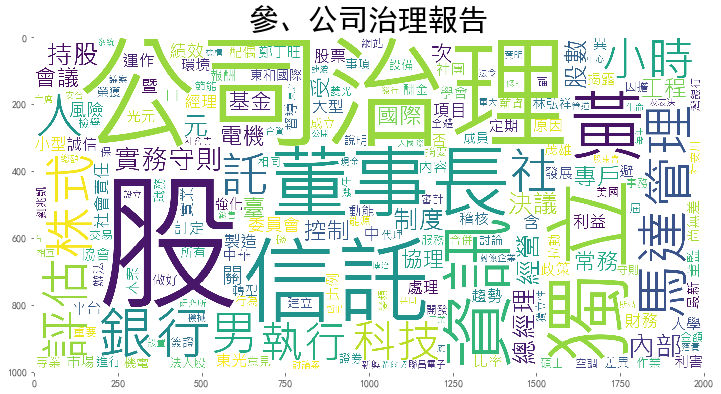

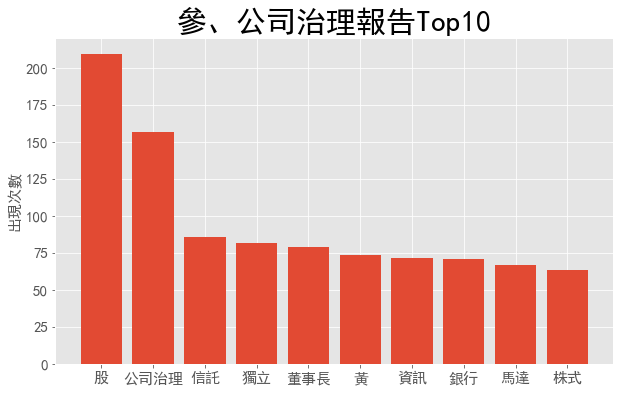

In [11]:
makewordcloud(3,Title[2])

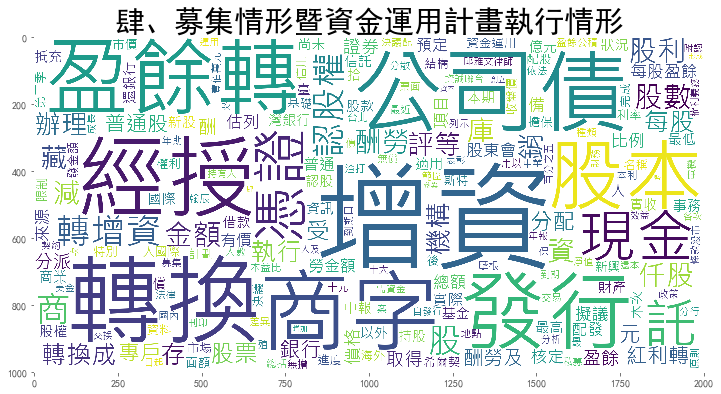

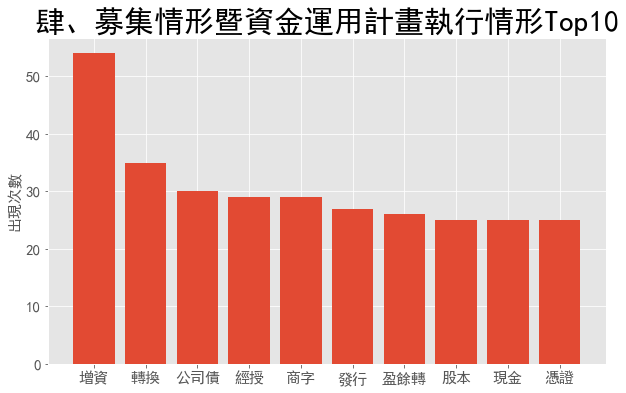

In [12]:
makewordcloud(4,Title[3])

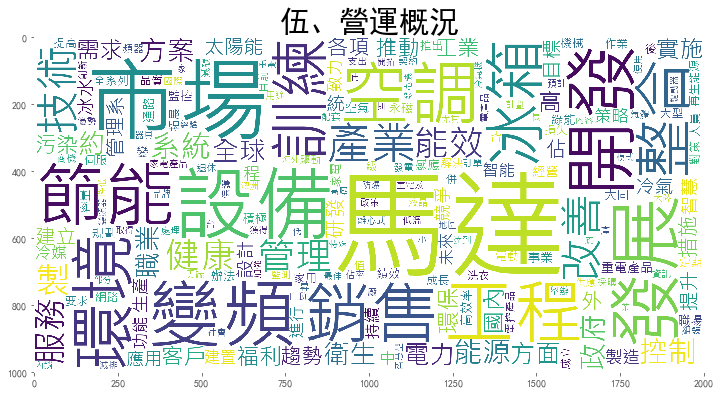

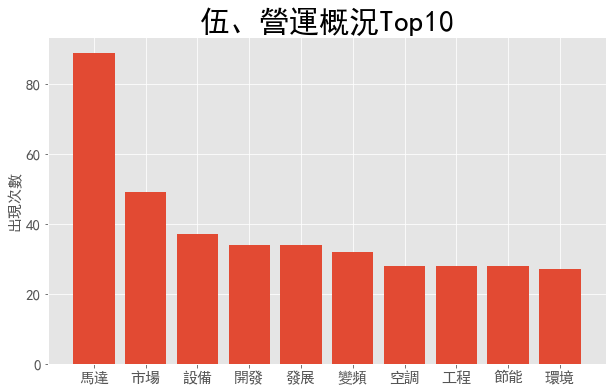

In [13]:
makewordcloud(5,Title[4])

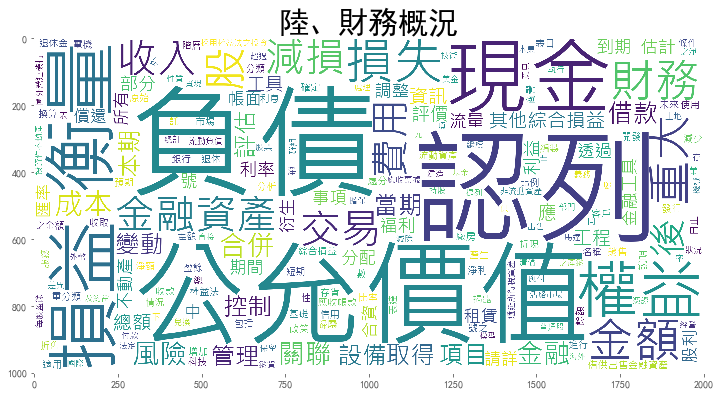

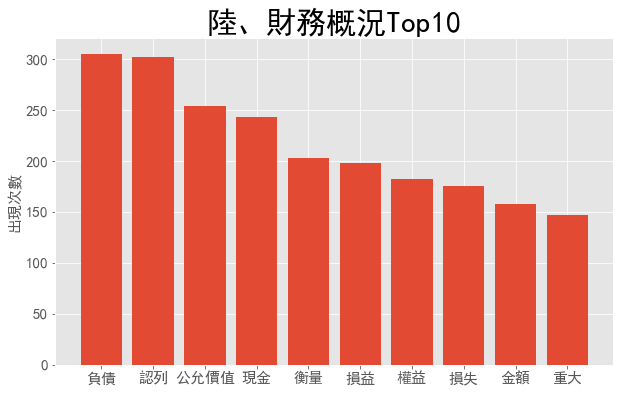

In [14]:
makewordcloud(6,Title[5])

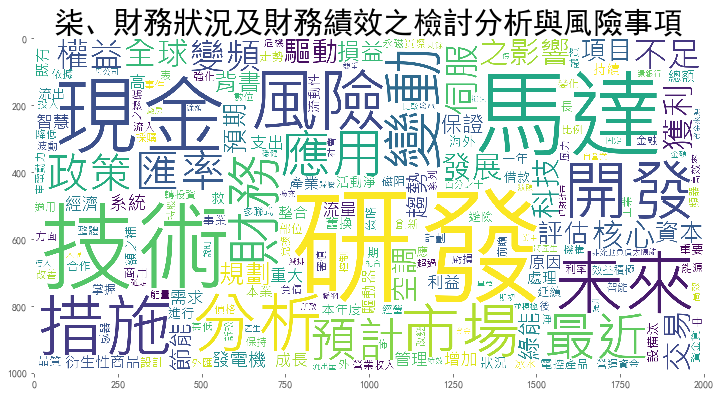

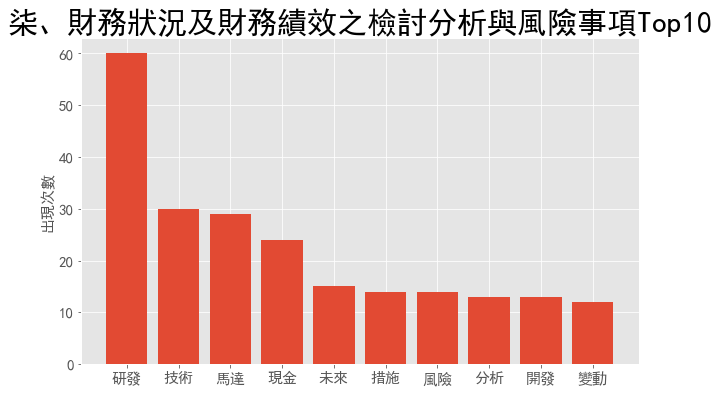

In [15]:
makewordcloud(7,Title[6])

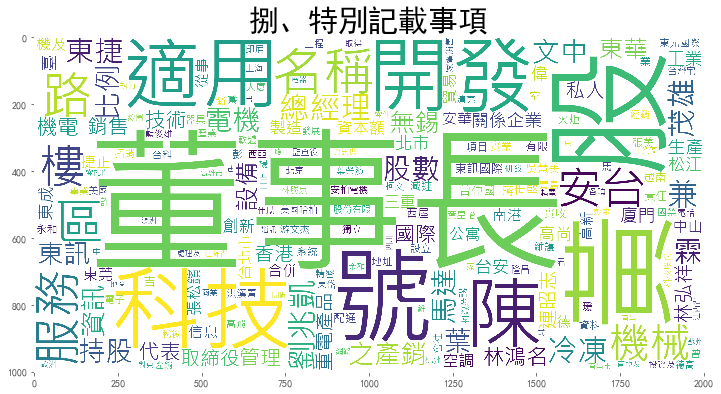

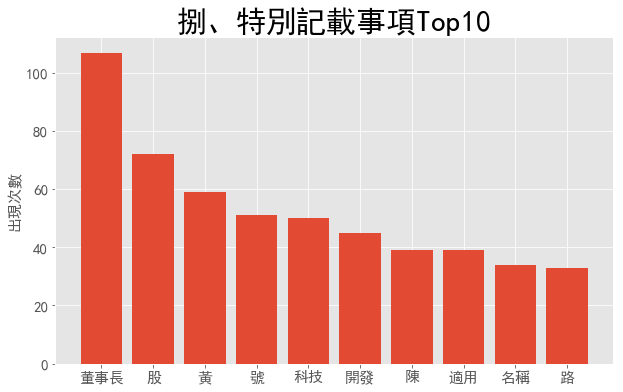

In [16]:
makewordcloud(8,Title[7])

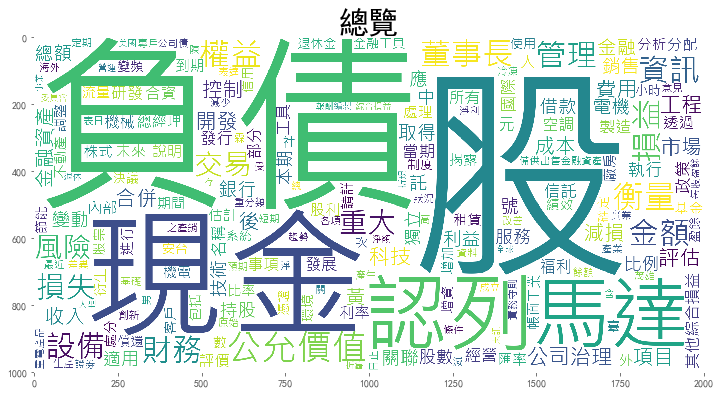

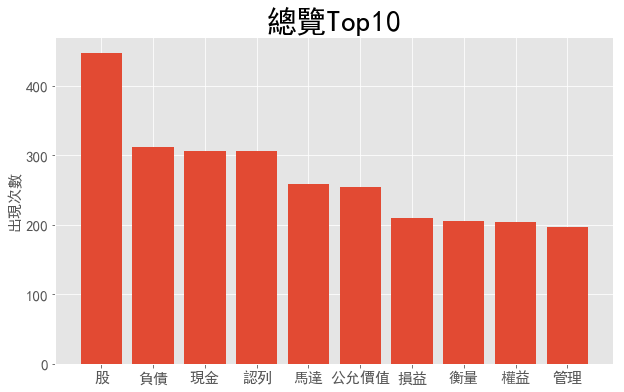

In [18]:
makewordcloud(0,"總覽")